PHASE 4 — DATA ANALYSIS 

In [20]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import seaborn as sn
import matplotlib.pyplot as plot
import os



In [3]:
load_dotenv()
db_url = os.getenv('DATABASE_URL')
engine =create_engine(db_url)

In [4]:
clean_retail_data_query ="select * from online_retail_data_set.online_retail_clean orc"
clean_retail_data = pd.read_sql(clean_retail_data_query,engine)

In [6]:
clean_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Year,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,12,2010,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,12,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010,1


In [101]:
clean_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392731 entries, 0 to 392730
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392731 non-null  object        
 1   StockCode    392731 non-null  object        
 2   Description  392731 non-null  object        
 3   Quantity     392731 non-null  int64         
 4   InvoiceDate  392731 non-null  datetime64[ns]
 5   UnitPrice    392731 non-null  float64       
 6   CustomerID   392731 non-null  float64       
 7   Country      392731 non-null  object        
 8   Revenue      392731 non-null  float64       
 9   Month        392731 non-null  int64         
 10  Year         392731 non-null  int64         
 11  Day          392731 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 36.0+ MB


In [109]:
year_dataset = clean_retail_data[clean_retail_data['Year']==2011]
total_revenue_per_month = (year_dataset.groupby('Month')['Revenue'].sum().sort_values(ascending=False))
total_revenue_per_month

Month
11    1156205.61
10    1035642.45
9      950686.30
5      677355.15
6      660046.05
8      644051.04
7      598962.90
3      594081.76
1      568101.31
12     517190.44
4      468374.33
2      446084.92
Name: Revenue, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_40620\3684629554.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.lineplot(data=total_revenue_per_month.reset_index(), x='Month', y='Revenue',palette ='Blues' ,linewidth=2)


Text(0, 0.5, 'Revenue')

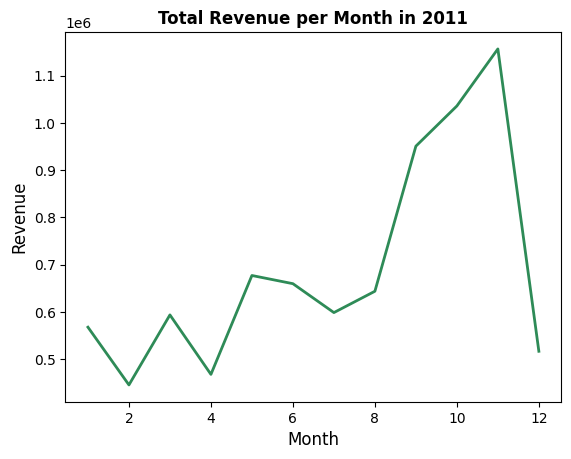

In [123]:

sn.lineplot(data=total_revenue_per_month.reset_index(), x='Month', y='Revenue',palette ='Blues' ,linewidth=2)
plot.title("Total Revenue per Month in 2011", fontsize=12, fontweight='bold')
plot.xlabel("Month", fontsize=12)
plot.ylabel("Revenue", fontsize=12)



In [58]:
country_data_filter = clean_retail_data[clean_retail_data['Country'] !='United Kingdom']
country_data_summary = (
    country_data_filter.groupby('Country')
    .agg(         total_rev=('Revenue', 'sum'),
        total_qty=('Quantity', 'sum')
    )      )
rank_country =country_data_summary.sort_values(by ='total_rev',ascending=False).head(10)
rank_country

,total_rev,total_qty
Country,,
Netherlands,285446.34,200937
EIRE,265262.46,140383
Germany,228678.40,119156
France,208934.31,111429
Australia,138453.81,84199
Spain,61558.56,27944
Switzerland,56443.95,30083
Belgium,41196.34,23237
Sweden,38367.83,36078


Text(0, 0.5, 'Total Revenue')

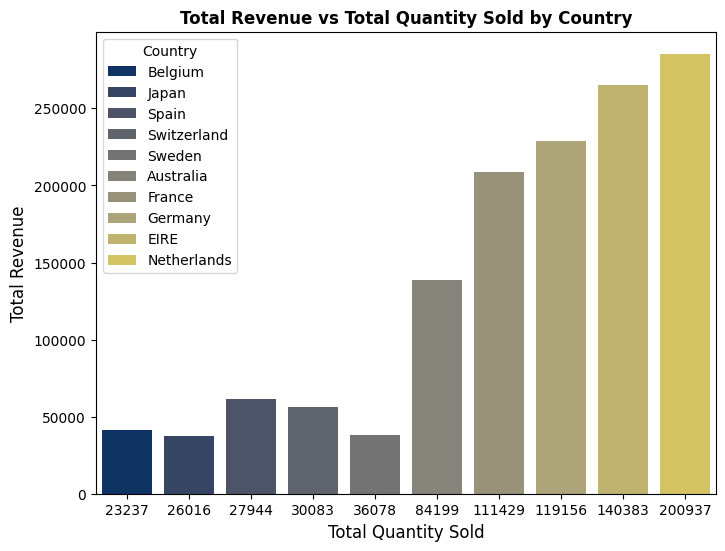

In [121]:
plot.figure(figsize=(8, 6))
sn.barplot(data=rank_country, x="total_qty", y="total_rev", hue="Country", palette="cividis")
plot.title("Total Revenue vs Total Quantity Sold by Country", fontsize=12, fontweight='bold')
plot.xlabel("Total Quantity Sold", fontsize=12)
plot.ylabel("Total Revenue", fontsize=12)



In [16]:
country_data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43505 entries, 26 to 392730
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    43505 non-null  object        
 1   StockCode    43505 non-null  object        
 2   Description  43505 non-null  object        
 3   Quantity     43505 non-null  int64         
 4   InvoiceDate  43505 non-null  datetime64[ns]
 5   UnitPrice    43505 non-null  float64       
 6   CustomerID   43505 non-null  float64       
 7   Country      43505 non-null  object        
 8   Revenue      43505 non-null  float64       
 9   Month        43505 non-null  int64         
 10  Year         43505 non-null  int64         
 11  Day          43505 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 4.3+ MB


In [92]:
customer_rank = (clean_retail_data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10))
customer_rank =customer_rank.reset_index()
customer_rank

,CustomerID,Revenue
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


C:\Users\Admin\AppData\Local\Temp\ipykernel_40620\4173688897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


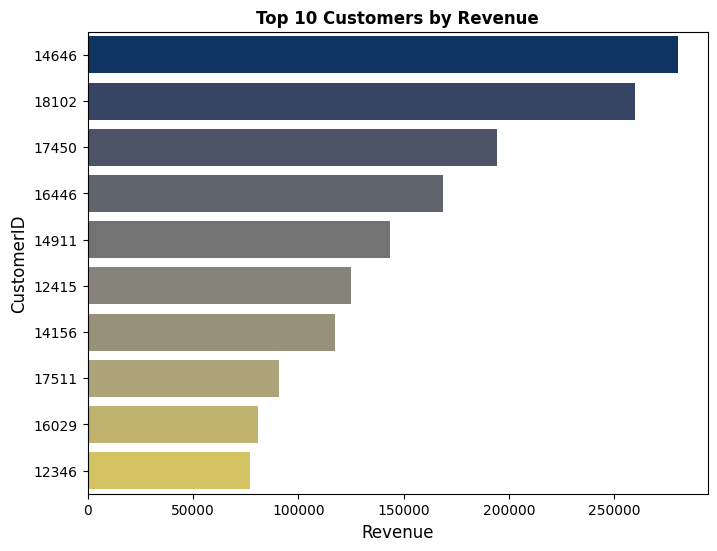

In [119]:
customer_rank['CustomerID'] = customer_rank['CustomerID'].astype(int).astype(str)
plot.figure(figsize=(8,6))
sn.barplot(
    data=customer_rank.reset_index(),
    x="Revenue",
    y="CustomerID",
    palette="cividis"
)

plot.title("Top 10 Customers by Revenue",fontsize=12, fontweight='bold')
plot.xlabel("Revenue", fontsize=12)
plot.ylabel("CustomerID", fontsize=12)
plot.show()



In [132]:
product_summary =(country_data_filter.groupby('Country',as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)).reset_index(drop=True)
product_summary

,Country,Quantity
0,Netherlands,200937
1,EIRE,140383
2,Germany,119156
3,France,111429
4,Australia,84199
5,Sweden,36078
6,Switzerland,30083
7,Spain,27944
8,Japan,26016
9,Belgium,23237


C:\Users\Admin\AppData\Local\Temp\ipykernel_40620\1549675852.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=product_summary.reset_index(), x='Quantity', y='Country',palette="cividis")


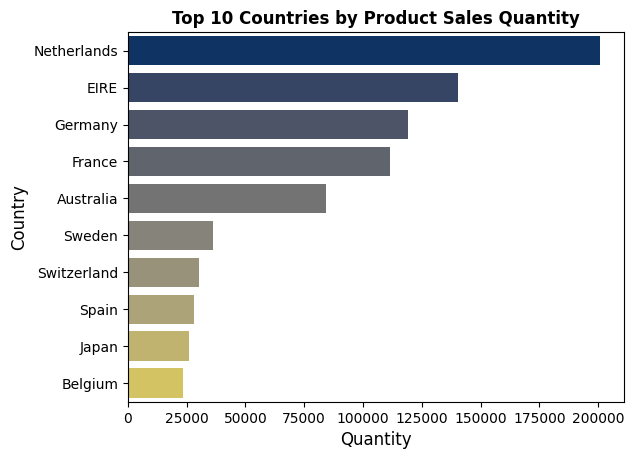

In [124]:


sn.barplot(data=product_summary.reset_index(), x='Quantity', y='Country',palette="cividis")
plot.title("Top 10 Countries by Product Sales Quantity",fontsize=12, fontweight='bold')
plot.xlabel("Quantity", fontsize=12)
plot.ylabel("Country", fontsize=12)
plot.show()
